In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=(10,10)

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)
#pd.options.display.float_format ='{:.6f}'.format

In [4]:
df_pro=pd.read_csv(r"C:\Users\sm983\Desktop\Ml advancced\Linear_Regression\life_data.csv")
df_pro.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
print(round((df_pro.isnull().sum()/df_pro.isnull().count())*100,2))

Country                             0.00
Year                                0.00
Status                              0.00
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
 BMI                                1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
 HIV/AIDS                           0.00
GDP                                15.25
Population                         22.19
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64


In [6]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df_pro.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df_pro.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df_pro.describe(include=object)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [10]:
df_pro.shape

(2938, 22)

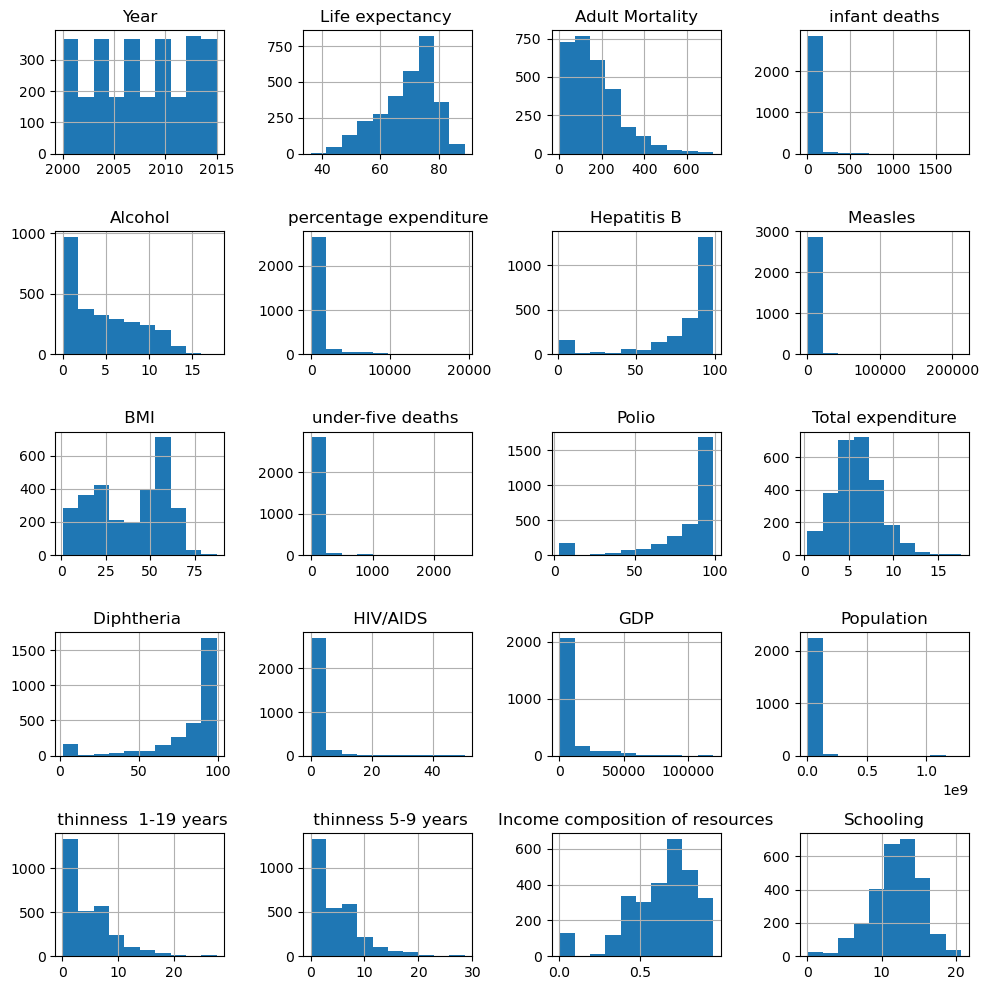

In [11]:
df_pro.hist()
plt.tight_layout()

In [12]:
Total = df_pro.isnull().sum().sort_values(ascending = False) 
Percent = (df_pro.isnull().sum()*100/df_pro.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data['Type'] = df_pro[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
Population,652,22.191967,float64
Hepatitis B,553,18.822328,float64
GDP,448,15.248468,float64
Total expenditure,226,7.692308,float64
Alcohol,194,6.603131,float64
Income composition of resources,167,5.684139,float64
Schooling,163,5.547992,float64
thinness 5-9 years,34,1.157250,float64
thinness 1-19 years,34,1.157250,float64
BMI,34,1.157250,float64


In [13]:
missing_data.index

Index(['Population', 'Hepatitis B', 'GDP', 'Total expenditure', 'Alcohol',
       'Income composition of resources', 'Schooling', ' thinness 5-9 years',
       ' thinness  1-19 years', ' BMI ', 'Polio', 'Diphtheria ',
       'Life expectancy ', 'Adult Mortality', ' HIV/AIDS', 'Country', 'Year',
       'Measles ', 'percentage expenditure', 'infant deaths', 'Status',
       'under-five deaths '],
      dtype='object')

In [14]:
columns_to_refill=['Population', 'Hepatitis B', 'GDP', 'Total expenditure', 'Alcohol',
       'Income composition of resources', 'Schooling', ' thinness 5-9 years',
       ' thinness  1-19 years', ' BMI ', 'Polio', 'Diphtheria ',
       'Life expectancy ', 'Adult Mortality']
for col in columns_to_refill:
    if col not in ['Schooling', 'Total expenditure']:
        median_value = df_pro[col].median()
        df_pro[col].fillna(median_value, inplace=True)
mean_schooling = df_pro['Schooling'].mean()
df_pro['Schooling'].fillna(mean_schooling, inplace=True)
mean_expenditure = df_pro['Total expenditure'].mean()
df_pro['Total expenditure'].fillna(mean_expenditure, inplace=True)

In [15]:
df_pro.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

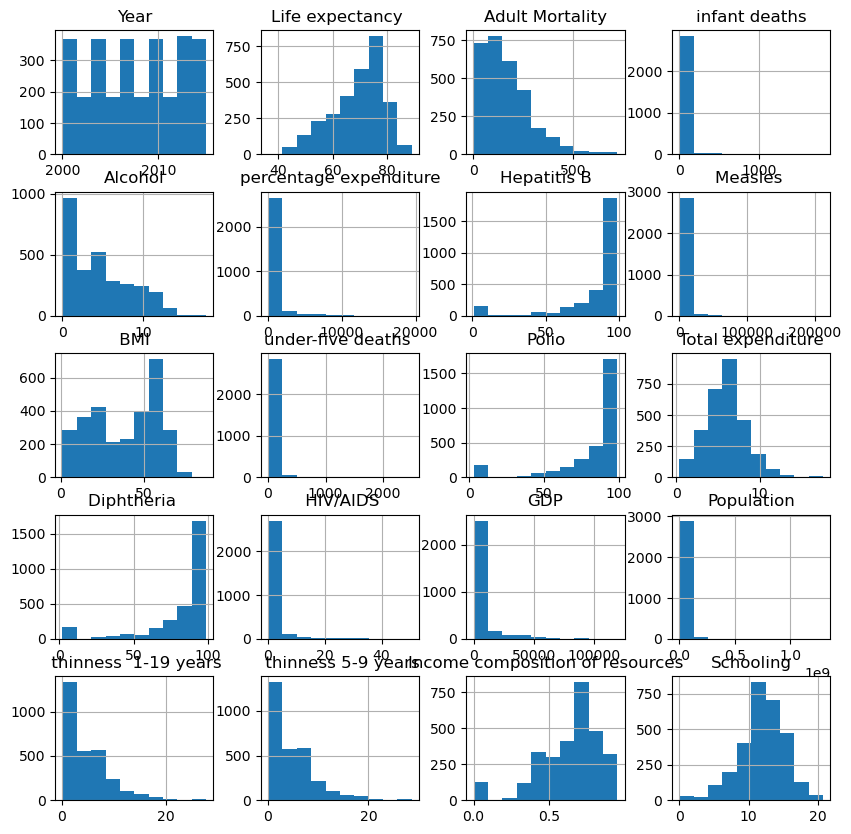

In [16]:
df_pro.hist()

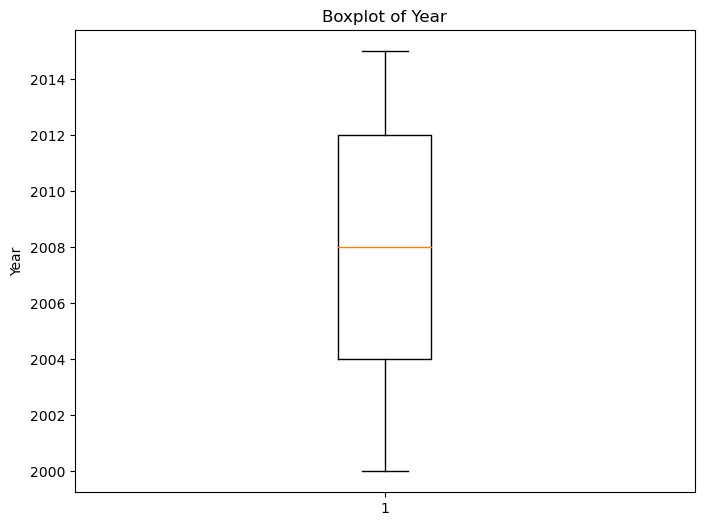

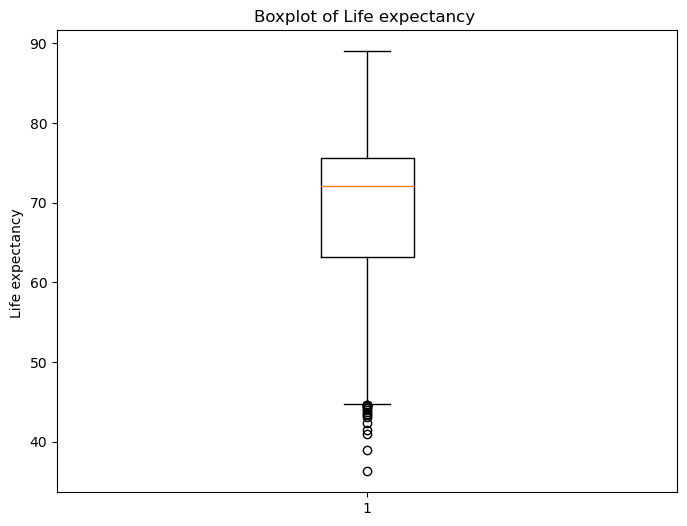

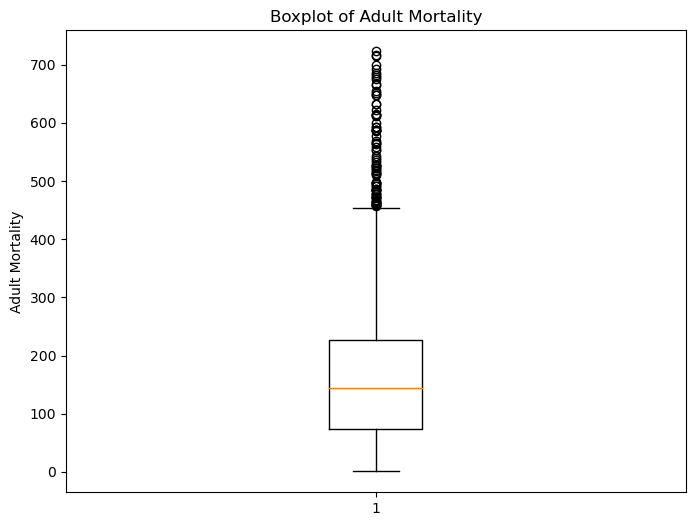

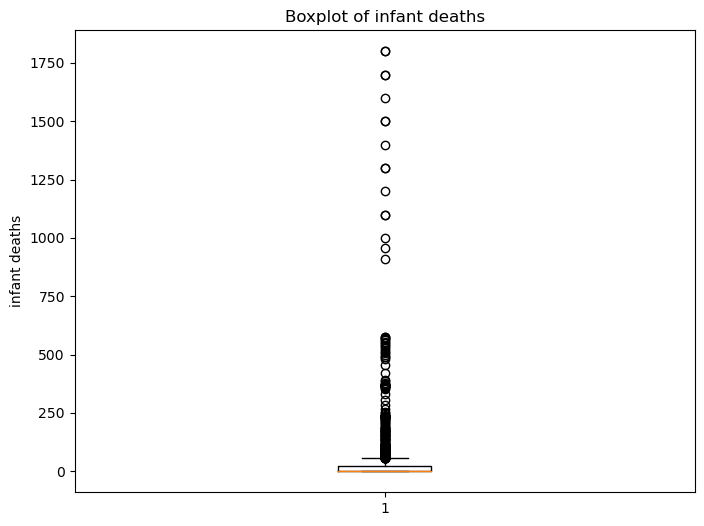

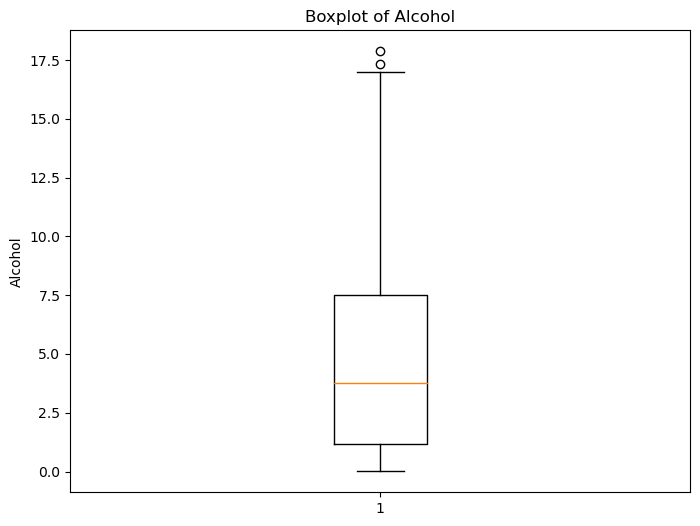

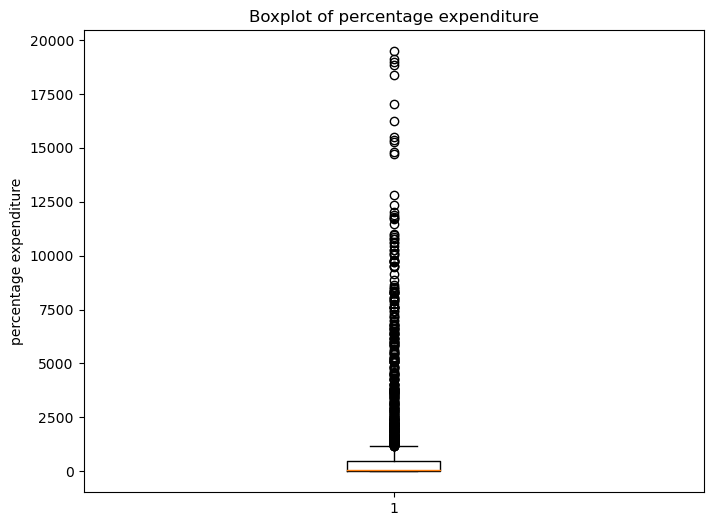

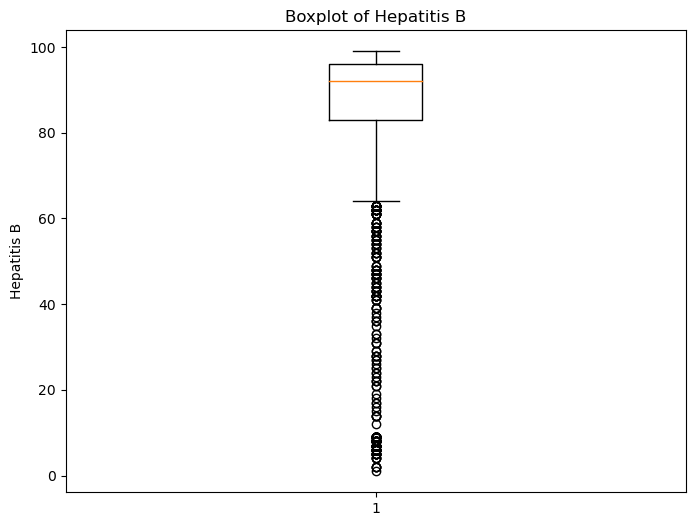

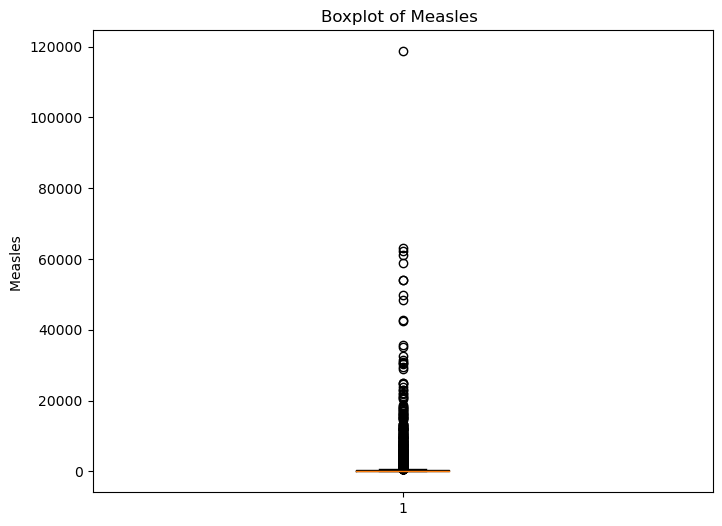

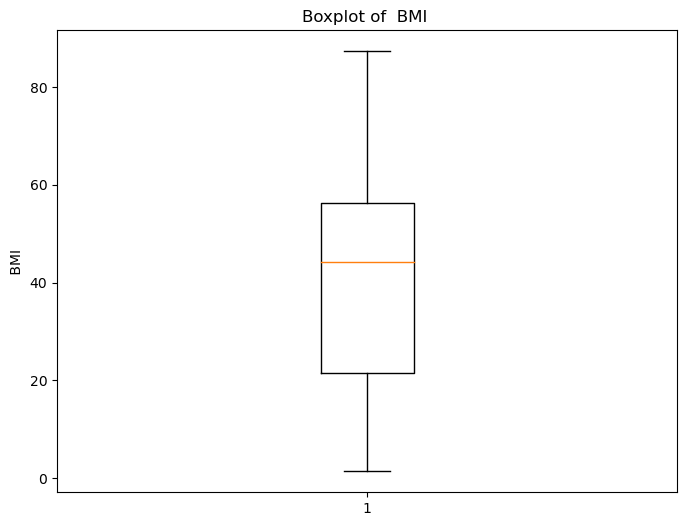

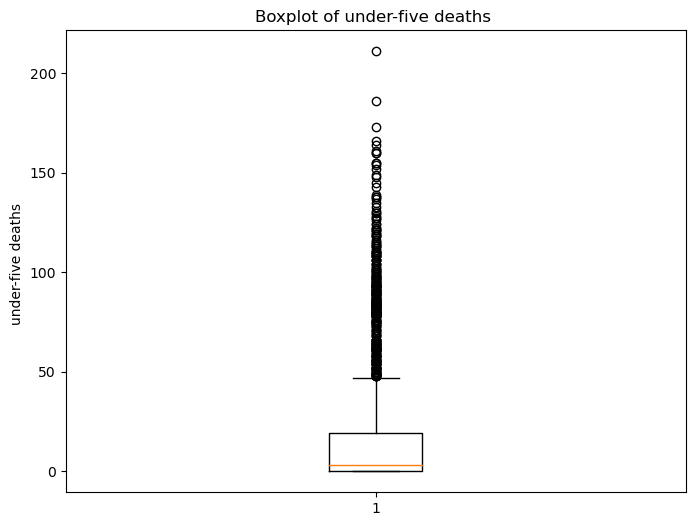

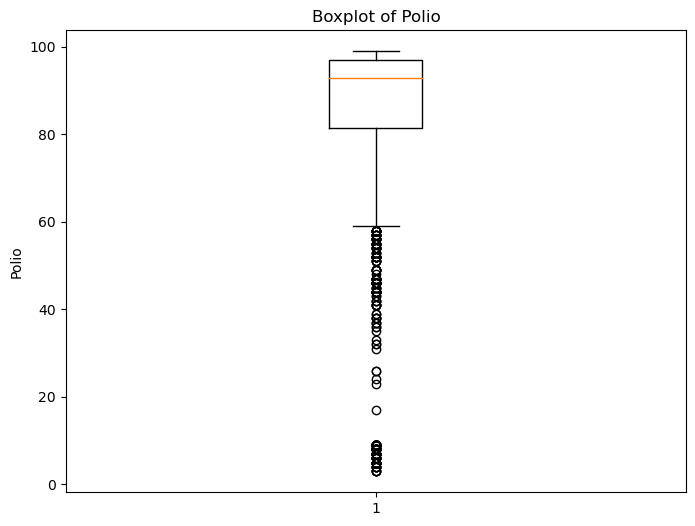

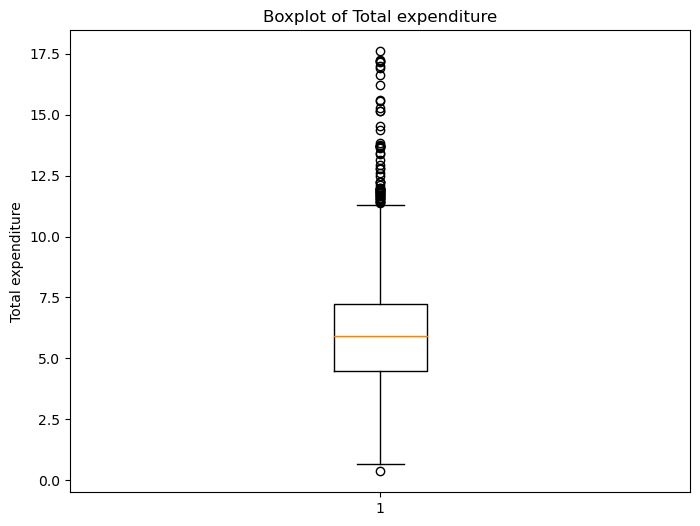

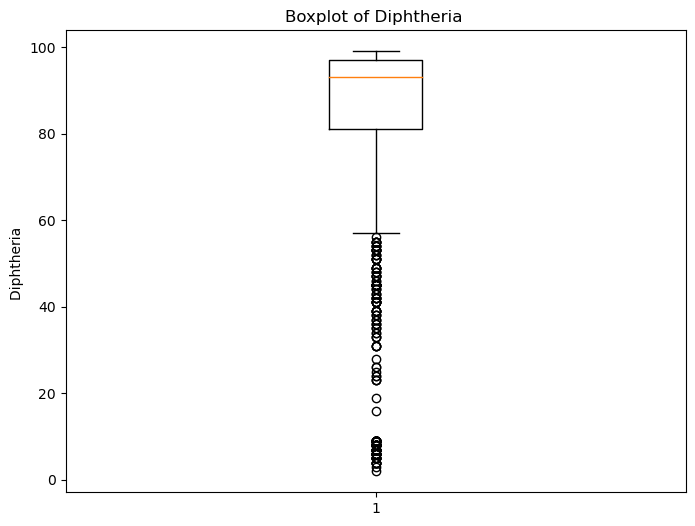

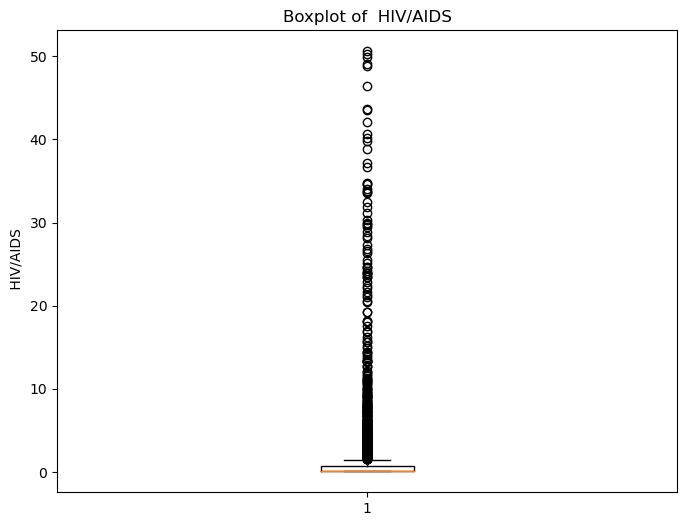

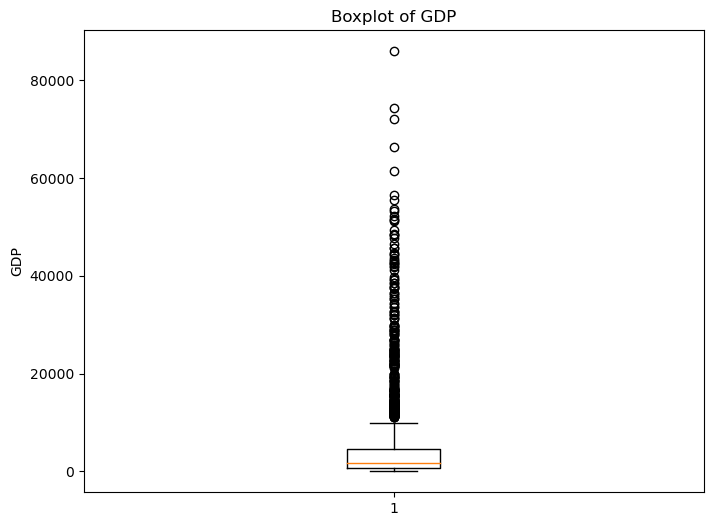

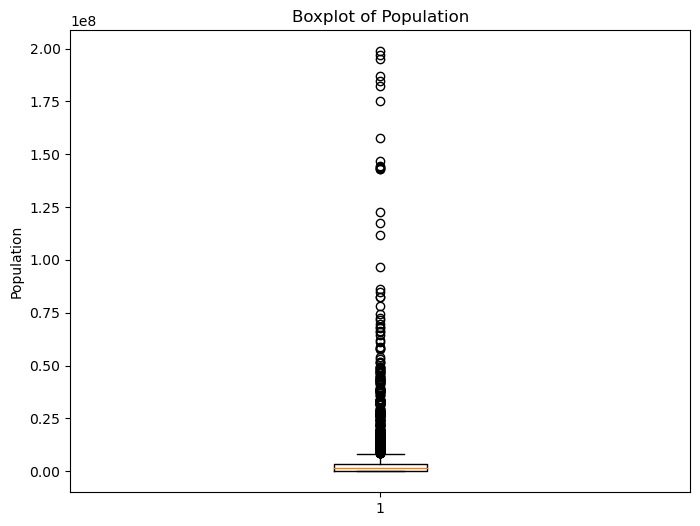

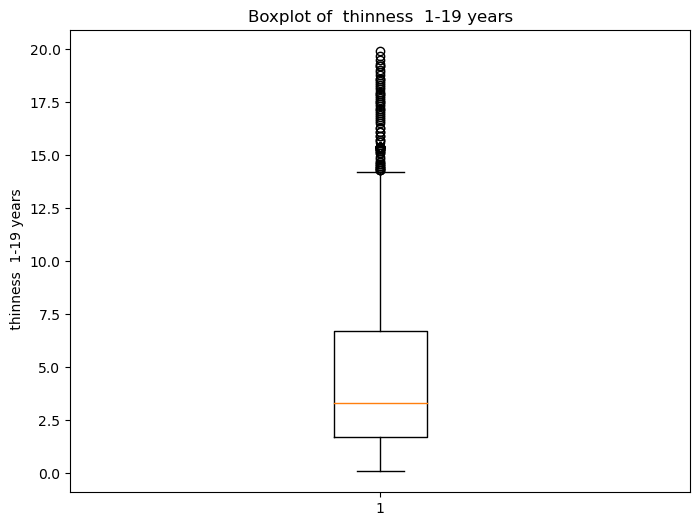

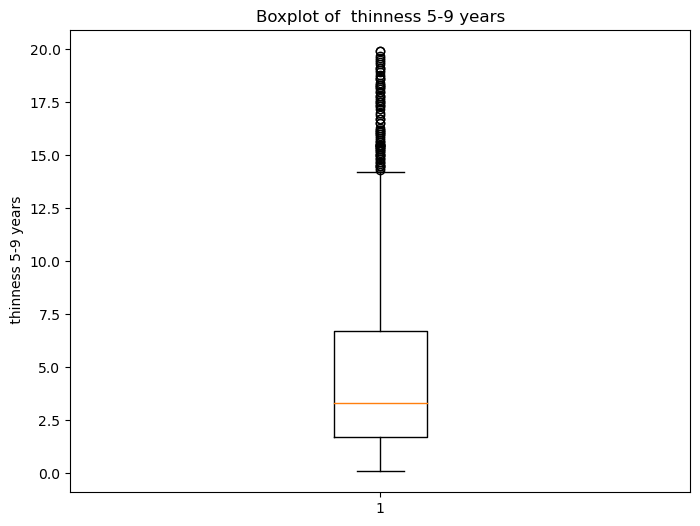

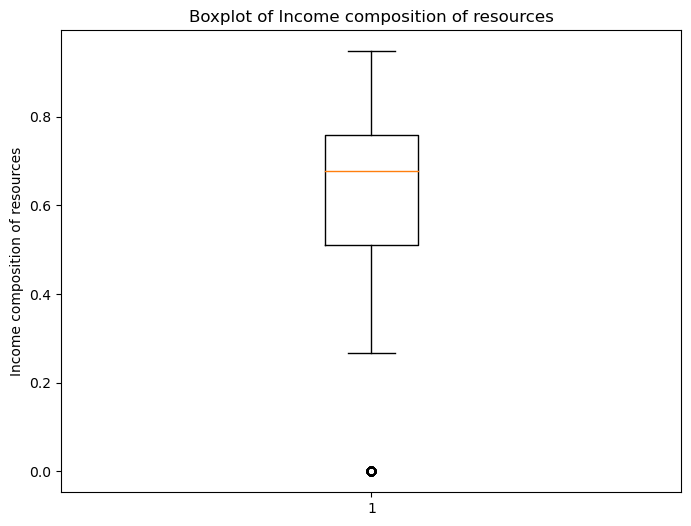

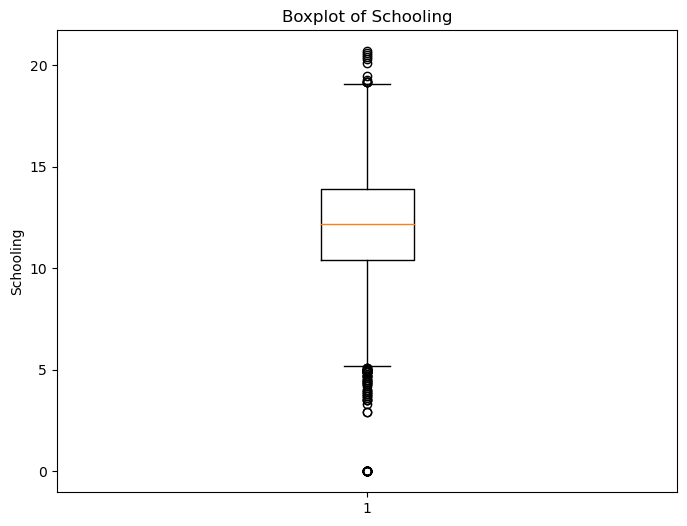

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
# Filter out non-numeric columns
numeric_columns = df_pro.select_dtypes(include=['number']).columns
# boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_pro[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()
    # Calculating IQR and filter outliers
    Q1 = df_pro[column].quantile(0.10)
    Q3 = df_pro[column].quantile(0.90)
    IQR = Q3 - Q1
    # Filtering the DataFrame based on the IQR
    df_pro = df_pro[(df_pro[column] >= Q1 - 1.5 * IQR) & (df_pro[column] <= Q3 + 1.5 * IQR)].reset_index(drop=True)


In [18]:
df_pro.shape

(2265, 22)

In [19]:
df_pro.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
df_pro['Country'].nunique()

185

In [21]:
df_pro['Status'].nunique()

2

In [22]:
df_pro['Status'].value_counts()

Status
Developing    1921
Developed      344
Name: count, dtype: int64

In [23]:
df_pro.replace({'Developing':0,'Developed':1},inplace=True)

In [24]:
df_pro['Status'].value_counts()

Status
0    1921
1     344
Name: count, dtype: int64

In [25]:
df_char=pd.get_dummies(df_pro['Country'],drop_first=True,dtype=int)
df_char.head()

,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Niue,Norway,Oman,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df_pro.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [27]:
df_pro.drop(columns=['Country'], inplace=True)

In [28]:
df_pro.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
corr=df_pro.corr()

In [30]:
corr

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.037038,0.078252,-0.006475,0.032600,-0.106464,-0.045205,0.003508,-0.073005,0.044066,0.026196,0.037104,0.051739,0.082917,-0.006466,0.031700,0.059562,0.037552,0.050485,0.208269,0.156044
Status,-0.037038,1.000000,0.427907,-0.283711,-0.214862,0.570014,0.326770,0.110049,-0.086583,0.270052,-0.210012,0.182241,0.258185,0.181587,-0.188305,0.294131,-0.071321,-0.343578,-0.341619,0.392418,0.425618
Life expectancy,0.078252,0.427907,1.000000,-0.686729,-0.538431,0.379457,0.363032,0.167278,-0.240776,0.521825,-0.580397,0.417604,0.206489,0.427106,-0.655543,0.379171,-0.088416,-0.463682,-0.453850,0.652384,0.717712
Adult Mortality,-0.006475,-0.283711,-0.686729,1.000000,0.385115,-0.185657,-0.253935,-0.113344,0.174032,-0.378739,0.407791,-0.269771,-0.138798,-0.267057,0.503840,-0.262719,0.082677,0.302551,0.303541,-0.432691,-0.476200
infant deaths,0.032600,-0.214862,-0.538431,0.385115,1.000000,-0.262021,-0.219053,-0.159427,0.361553,-0.340421,0.988389,-0.263768,-0.051136,-0.261775,0.350055,-0.236210,0.314764,0.362918,0.366357,-0.294941,-0.413729
Alcohol,-0.106464,0.570014,0.379457,-0.185657,-0.262021,1.000000,0.326866,0.114772,-0.113536,0.273274,-0.257017,0.186163,0.259858,0.184252,-0.097202,0.305141,-0.073574,-0.425335,-0.416912,0.379257,0.444237
percentage expenditure,-0.045205,0.326770,0.363032,-0.253935,-0.219053,0.326866,1.000000,0.034999,-0.087705,0.200006,-0.216351,0.123246,0.142665,0.097292,-0.147707,0.832714,-0.053556,-0.232698,-0.233391,0.340665,0.384467
Hepatitis B,0.003508,0.110049,0.167278,-0.113344,-0.159427,0.114772,0.034999,1.000000,-0.076908,0.086808,-0.165463,0.392086,0.049138,0.515241,-0.108649,0.080937,-0.062405,-0.055133,-0.056631,0.112287,0.138676
Measles,-0.073005,-0.086583,-0.240776,0.174032,0.361553,-0.113536,-0.087705,-0.076908,1.000000,-0.179992,0.362651,-0.168052,-0.065753,-0.167886,0.175289,-0.100117,0.178861,0.239368,0.235689,-0.122706,-0.193962
BMI,0.044066,0.270052,0.521825,-0.378739,-0.340421,0.273274,0.200006,0.086808,-0.179992,1.000000,-0.361979,0.212507,0.198895,0.214328,-0.372780,0.246838,-0.047266,-0.546743,-0.548976,0.422338,0.452036


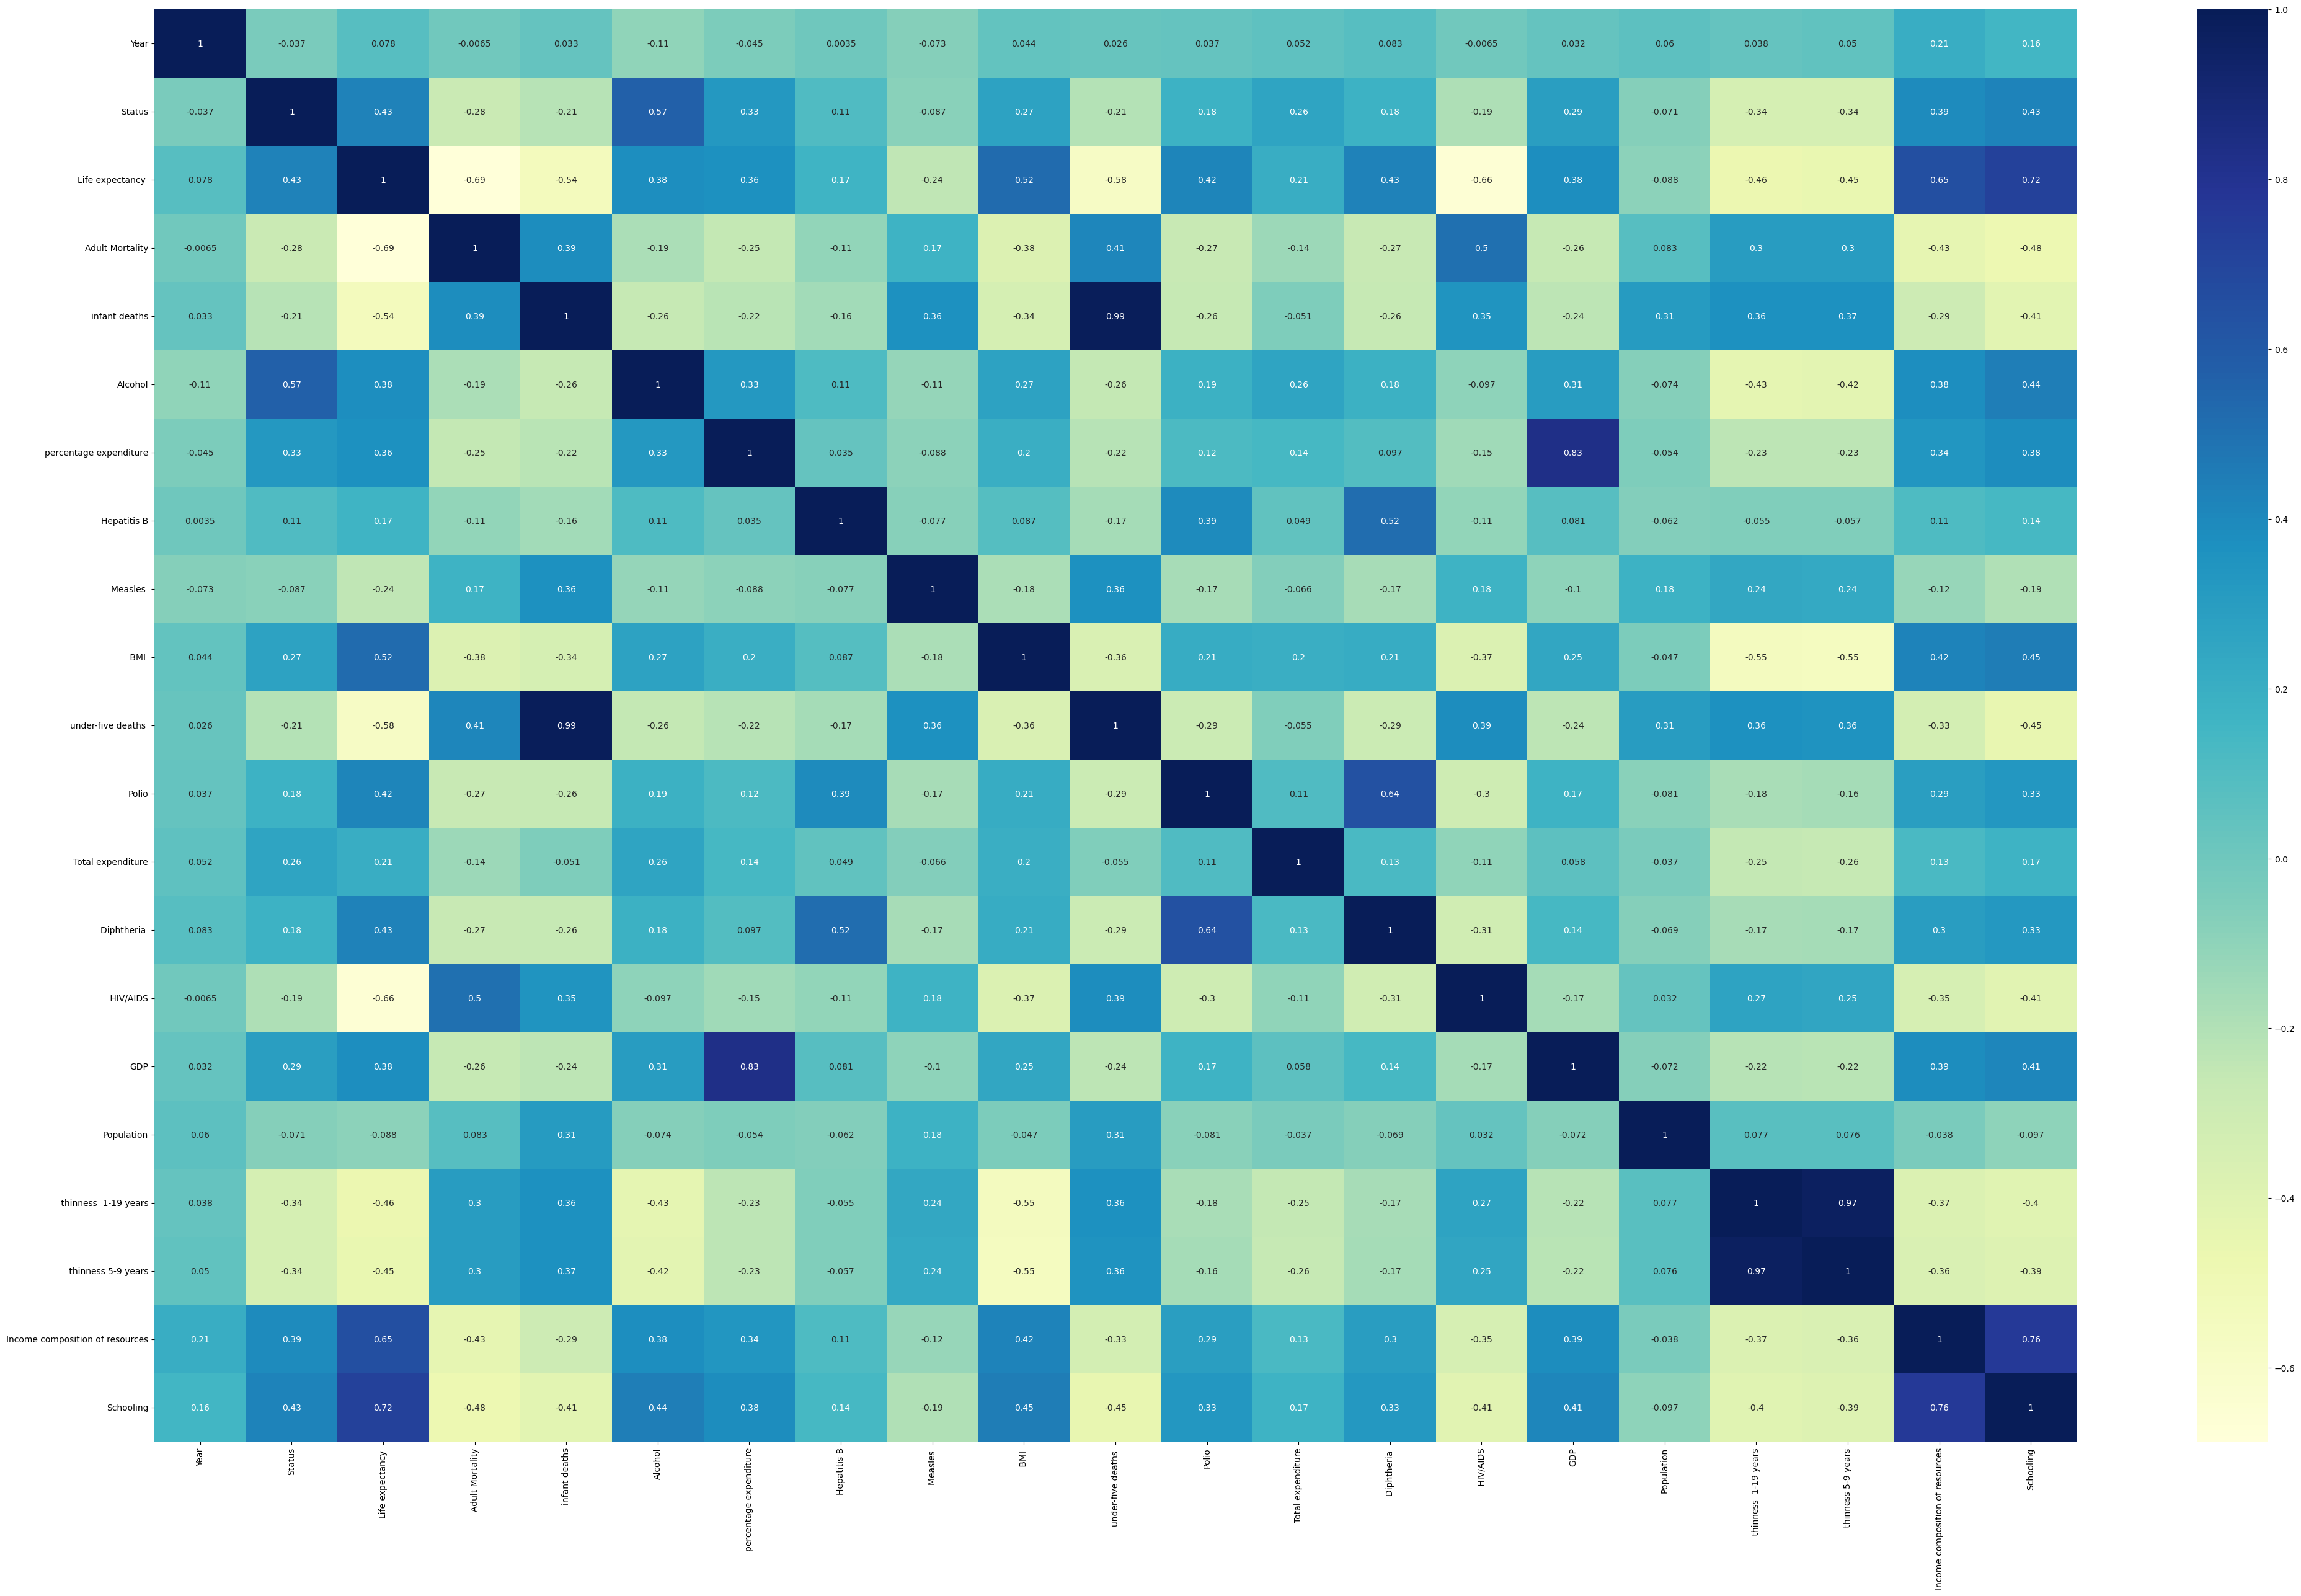

In [31]:
plt.figure(figsize=(50,30))
sns.heatmap(df_pro.corr(),annot=True,cmap="YlGnBu")
plt.show()

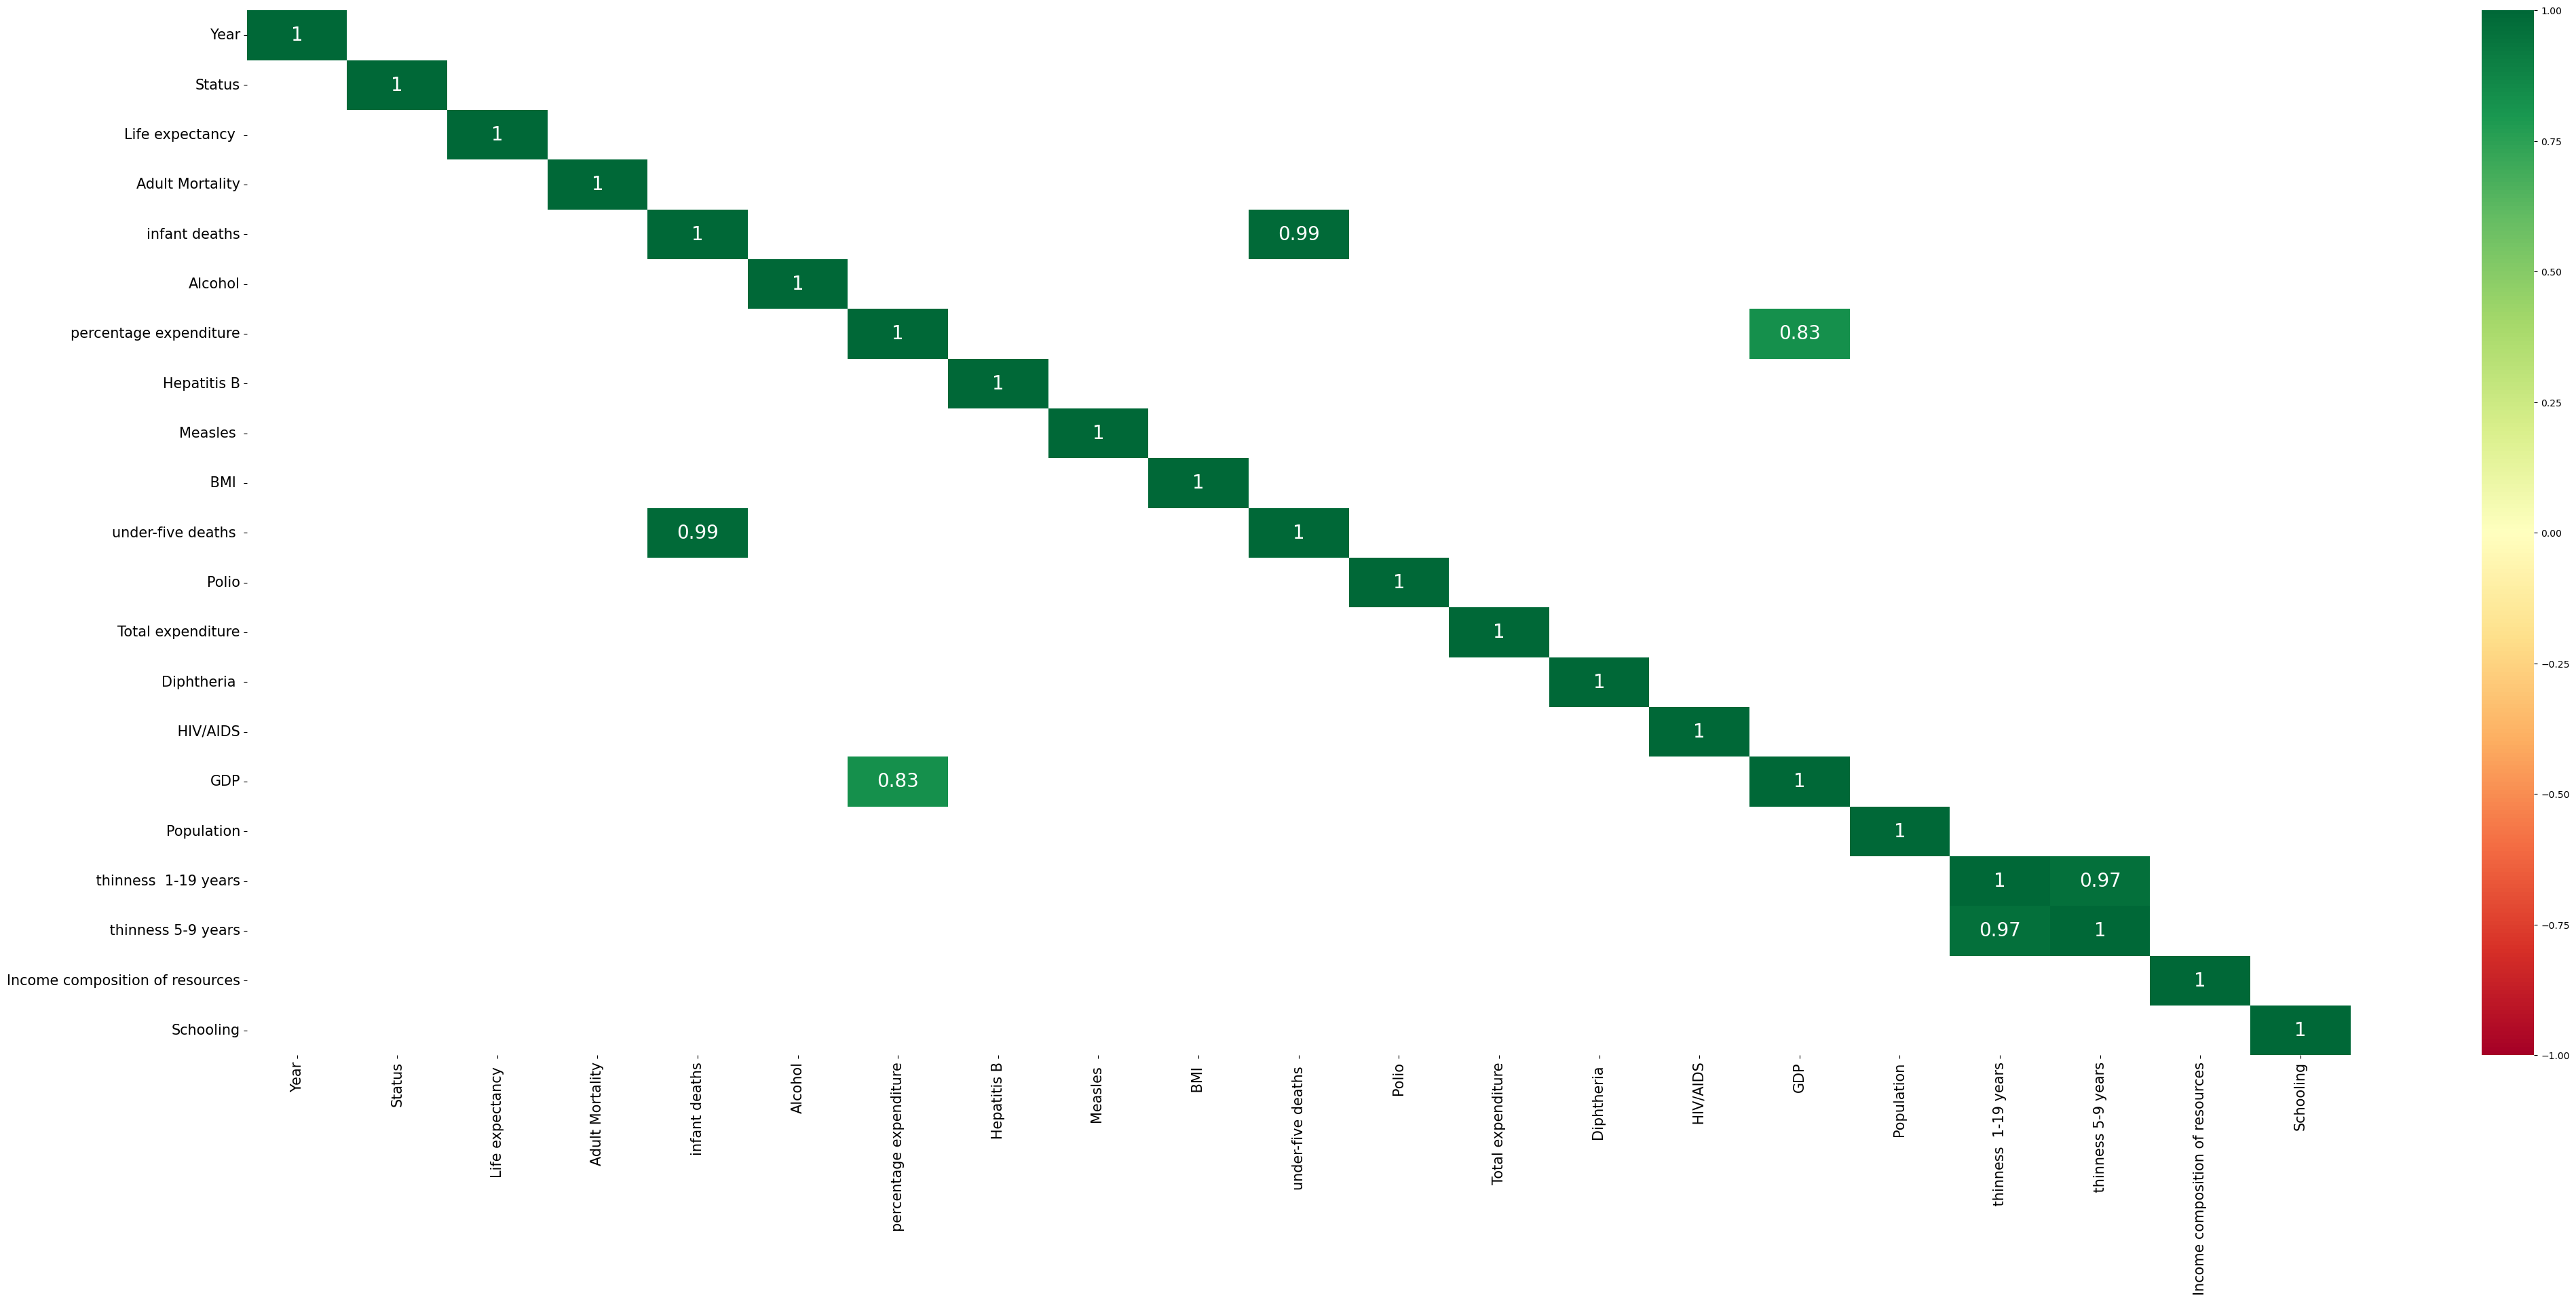

In [32]:
corr=df_pro.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

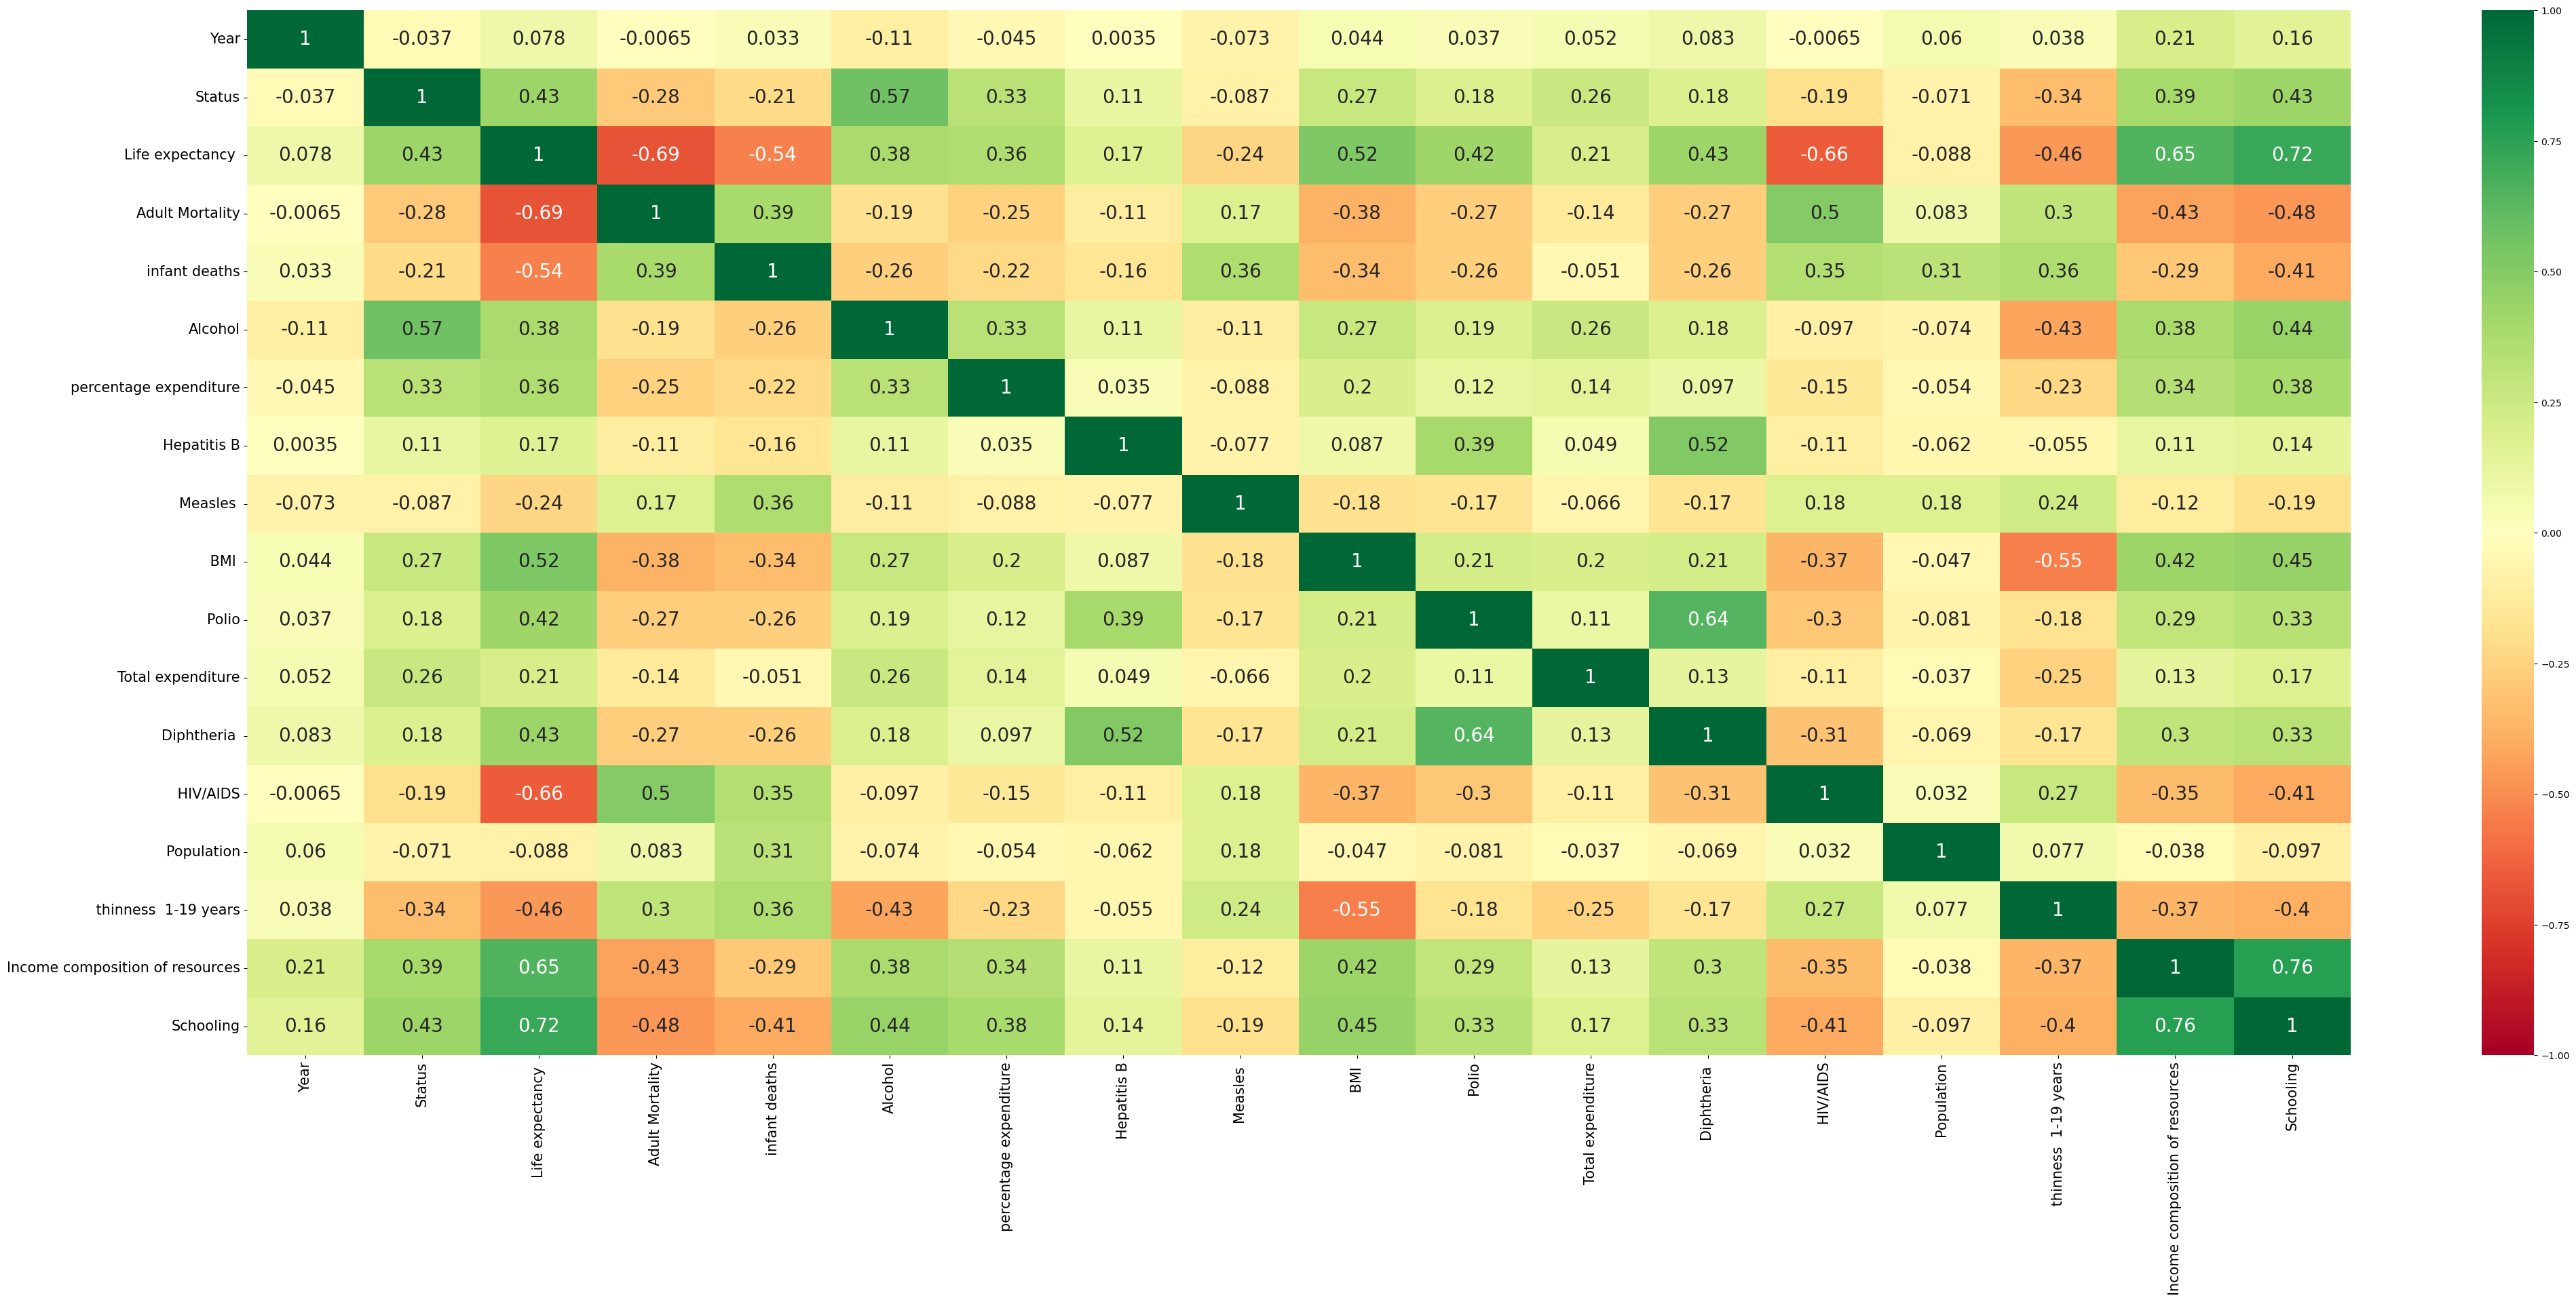

In [33]:
corr_matrix = df_pro.corr()
correlation_range = (-0.8, 0.8)  
cols_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if not (correlation_range[0] <= abs(corr_value) <= correlation_range[1]):
            colname = corr_matrix.columns[i]
            cols_to_drop.add(colname)
# Drop the columns with correlation values outside the specified range
df_pro_filtered = df_pro.drop(cols_to_drop, axis=1)
# Display the heatmap after removal
plt.figure(figsize=(50, 20))
sns.heatmap(df_pro_filtered.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [34]:
df_pro_filtered.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5


In [35]:
df_pro_filtered.shape

(2265, 18)

In [36]:
df_char.shape

(2265, 184)

In [37]:
df_pro_filtered.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'Population', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [38]:
df_life=pd.concat([df_char,df_pro_filtered],axis=1)

In [39]:
df_life.head()

,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Niue,Norway,Oman,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [40]:
y=df_life.pop('Life expectancy ')
x=df_life

In [41]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [42]:
x.head()

,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Niue,Norway,Oman,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,0,272.0,69,0.01,

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
print(x_scaled.head())

   Albania  Algeria  Angola  Antigua and Barbuda  Argentina  Armenia  \
0      0.0      0.0     0.0                  0.0        0.0      0.0   
1      0.0      0.0     0.0                  0.0        0.0      0.0   
2      0.0      0.0     0.0                  0.0        0.0      0.0   
3      0.0      0.0     0.0                  0.0        0.0      0.0   
4      0.0      0.0     0.0                  0.0        0.0      0.0   

   Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  \
0        0.0      0.0         0.0      0.0      0.0         0.0       0.0   
1        0.0      0.0         0.0      0.0      0.0         0.0       0.0   
2        0.0      0.0         0.0      0.0      0.0         0.0       0.0   
3        0.0      0.0         0.0      0.0      0.0         0.0       0.0   
4        0.0      0.0         0.0      0.0      0.0         0.0       0.0   

   Belarus  Belgium  Belize  Benin  Bhutan  Bolivia (Plurinational State of)  \
0      0.0      0.0     

In [44]:
df_life.shape

(2265, 201)

In [45]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [136]:
import statsmodels.api as sm  
x = sm.add_constant(x)

In [137]:
x.head()

,const,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Niue,Norway,Oman,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,The former Yugoslav republic of Macedonia,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Feature selection-Chi square Method

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = df_dm.drop(['Outcome'],axis = 1)
y = df_dm['Outcome']
select_feature = SelectKBest(chi2, k=6).fit(x,y)
X = select_feature.transform(x)
X

selected_features = select_feature.get_support(indices=True)
selected_feature_names = x.columns[selected_features].tolist()
selected_feature_names

# Train and test split

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1585, 202) (680, 202) (1585,) (680,)


# Model Building

# Linear Regression,lasso,ridge,svr,Decision tree regressor,Random forest Regressor

In [156]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [157]:
models = [LinearRegression,Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [158]:
print(f"Modle :{len(models)},\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


Modle :6,
MAE :6,
MSE :6,
RMSE :6,
R Sq:6


regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

# OLS

In [159]:
from statsmodels.formula.api import ols
linear_regression_ols=sm.OLS(y_train,x_train).fit()
print(linear_regression_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     182.7
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:33:20   Log-Likelihood:                -3019.4
No. Observations:                1585   AIC:                             6429.
Df Residuals:                    1390   BIC:                             7476.
Df Model:                         194                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [160]:
y_pred=linear_regression_ols.predict(x_test)

In [161]:
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

# Bagging

In [162]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=10))
meta_estimator.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=10))

In [163]:
y_pred = meta_estimator.predict(x_test)

In [164]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [165]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :8,
MSE :8,
RMSE :8,
R Sq:8


# Extra Trees

In [166]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
meta_estimator_ex = BaggingRegressor(ExtraTreesRegressor(random_state=10))
meta_estimator_ex.fit(x_train, y_train)

BaggingRegressor(estimator=ExtraTreesRegressor(random_state=10))

In [167]:
y_pred = meta_estimator_ex.predict(x_test)

In [168]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [169]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :9,
MSE :9,
RMSE :9,
R Sq:9


# ADABoost Regressor

In [170]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(random_state=10)
adaboost.fit(x_train, y_train)

AdaBoostRegressor(random_state=10)

In [171]:
y_pred  = adaboost.predict(x_test)

In [172]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [173]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :10,
MSE :10,
RMSE :10,
R Sq:10


# XGBoost

In [174]:
from xgboost.sklearn import XGBRegressor
xgbm = XGBRegressor(random_state=1, learning_rate=0.01)
xgbm.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [175]:
y_pred  = xgbm.predict(x_test)

In [176]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [177]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :11,
MSE :11,
RMSE :11,
R Sq:11


# Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=100, random_state=0)
GradientBoosting=reg.fit(x_train, y_train)

In [179]:
y_pred = GradientBoosting.predict(x_test)

In [180]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [181]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :12,
MSE :12,
RMSE :12,
R Sq:12


# Random Forest With Tunned Parameters

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["squared_error"],
              "min_samples_split": [20, 30, 40],
              "max_depth": [20,25,30],
              "min_samples_leaf": [20, 40, 50],
              "max_leaf_nodes": [20, 30,50],
              }
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, error_score='raise')

In [183]:
rf_best_fit=rf_grid_search.fit(x_train,y_train)
rf_best_fit

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [20, 25, 30],
                         'max_leaf_nodes': [20, 30, 50],
                         'min_samples_leaf': [20, 40, 50],
                         'min_samples_split': [20, 30, 40]})

In [184]:
rf_grid_model = RandomForestRegressor(n_estimators = rf_best_fit.best_params_.get('n_estimators'),
                                       max_depth = rf_best_fit.best_params_.get('max_depth'),
                                       max_leaf_nodes = rf_best_fit.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = rf_best_fit.best_params_.get('min_samples_leaf'),
                                       min_samples_split = rf_best_fit.best_params_.get('min_samples_split'),
                                       random_state=10)

In [185]:
y_pred = rf_best_fit.predict(x_test)

In [186]:
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [187]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :13,
MSE :13,
RMSE :13,
R Sq:13


# Decision Tree with tunning

In [188]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [189]:
param_grid = {
              "criterion": ["squared_error"],
              "min_samples_split": [50, 60, 70],
              "max_depth": [25,30,35],
              "min_samples_leaf": [30, 40, 100],
              "max_leaf_nodes": [70, 80, 100],
              }
decisiontree_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, error_score='raise')
grid_search=decisiontree_grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'criterion': 'squared_error', 'max_depth': 25, 'max_leaf_nodes': 70, 'min_samples_leaf': 30, 'min_samples_split': 50}


In [190]:
rf_grid_model = DecisionTreeRegressor(max_depth = grid_search.best_params_.get('max_depth'),
                                       max_leaf_nodes = grid_search.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = grid_search.best_params_.get('min_samples_leaf'),
                                       min_samples_split = grid_search.best_params_.get('min_samples_split'),
                                       random_state=10 )

In [191]:
y_pred = grid_search.predict(x_test)

In [192]:
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [193]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :14,
MSE :14,
RMSE :14,
R Sq:14


# Decision Tree Prunning

In [194]:
#pruning decision tree
prune = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 25 ,min_samples_split=10, random_state = 10)
decision_tree_prune = prune.fit(x_train, y_train)

In [195]:
y_pred = decision_tree_prune.predict(x_test)

In [196]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
mae_scores.append(mean_absolute_error(y_test, y_pred))
mse_scores.append(mean_squared_error(y_test, y_pred))
rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2_scores.append(r2_score(y_test, y_pred))

In [197]:
print(f"\nMAE :{len(mae_scores)},\nMSE :{len(mse_scores)},\nRMSE :{len(rmse_scores)},\nR Sq:{len(r2_scores)}")


MAE :15,
MSE :15,
RMSE :15,
R Sq:15


In [198]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor",'OLS','Bagging Meta Estimator','Extra Trees','Ada Boost','XGB','Gradient Boosting','Decision Tree with Hyper tuning','Random Forest with Hyper Tuning','Decision Tree Pruned'],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
},index=[i for i in range(0,len(mse_scores))])

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,1.163323,4.280777,2.069004,0.936573
Lasso,2.950865,15.835508,3.979385,0.765369
Ridge,1.348985,4.701468,2.168287,0.930340
SVR,6.116051,72.300929,8.502995,-0.071265
Decision Tree Regressor,1.535441,6.605250,2.570068,0.902132
Random Forest Regressor,1.142801,3.474300,1.863947,0.948522
OLS,1.163323,4.280777,2.069004,0.936573
Bagging Meta Estimator,1.267647,4.164241,2.040647,0.938299
Extra Trees,0.944546,3.285592,1.812620,0.951318


## Conclusion:

After trying different methods to predict life expectancy, we found that some models worked better than others. Models like Random Forest Regressor and Extra Trees were the best, giving us the most accurate predictions. Simple models like Linear Regression did okay, but not as good as the more complex ones. Some methods, like Support Vector Regression, didn't work well at all. Even when we tried to improve simpler models with hyperparameter tuning, they didn't always get better. So, for predicting life expectancy, it's best to use models like Random Forest Regressor and Extra Trees because they give the most accurate results.